# random variables and modulo division

Random numbers, while impossible to generate algorithmically, can approximately rather closely. While rigorous analysis of exactly how close approximations are and what shortcomings exist are a matter of ongoing research, the current body of knowledge on the subject is quite immense. Take [this paper](http://random.mat.sbg.ac.at/results/peter/A19final.pdf) as a starting point. 

When using random numbers, one often needs to generate numbers within a range, via sampliing a set of integers, real numbers, etc. **Extreme** caution must be taken when using custom methods not provided in the standard libraries or other well-vetted ones. Hacky solutions can often cause otherwise random sets of number to exhibit non-random properties. 


Take this common scenario:  

Suppose you want to generate a set of random numbers whose elements are between 0 and 1000, and your RNG outputs an integer between 0 and 34767. You come up with a clever hack:  

\begin{equation}
    x_{random} = RANDOM \mod 1000
\end{equation}

Now, the space of $0\leq x \leq32768$ gets mapped down to $0 \leq x \leq 1000$. See the results:  

In [15]:
srand(1234) # for reproducibility

modulus = 1000
rand_data = rand(1:32768, 1000000);
modulo_data = rand_data % modulus;

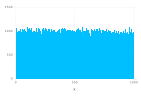

In [16]:
using Gadfly

plot(x=modulo_data, Geom.histogram(bincount=modulus))

Seems random at first glance. Now, see what happens with a higher modulus:  

In [25]:
srand(1234)

big_modulus = 10000
rand_data = rand(1:32768, 1000000);
big_modulo_data = rand_data % big_modulus;

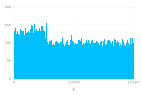

In [26]:
using Gadfly

plot(x=big_modulo_data, Geom.histogram(bincount=big_modulus))

This result is decidedly non-random. The reason should be rather obvious at this point. Mapping a random uniform distrubution to a smaller space using a modulus that is not a factor of the original space will cause some 'bins' to be more likely to get mapped than others. The result - a non-uniform random distrubution.  

This isn't a complicated issue to deal with. RNG libraries of any respecable programming account for this already. Just use library functions. 

In the event that such functions don't exist, always remember that quick, hacky solutions can produce unintended effects that break the functionality you were trying to achieve. 


In other words, profile you bash scripts.

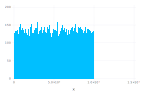

In [29]:
scaled_big_modulo_data = ( rand_data / 32768  * big_modulus );
plot(x=scaled_big_modulo_data, Geom.histogram(bincount=big_modulus))